<a href="https://www.kaggle.com/code/hityangzijian/covid-dinn-train?scriptVersionId=111289337" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pycaret-ts-alpha --ignore-install llvmlite
!pip install pillow==8.4.0

     |████████████████████████████████| 468 kB 4.1 MB/s            
     |████████████████████████████████| 34.6 MB 49.8 MB/s            
     |████████████████████████████████| 9.9 MB 50.8 MB/s            
     |████████████████████████████████| 199 kB 13.2 MB/s            
     |████████████████████████████████| 3.3 MB 32.8 MB/s            
     |████████████████████████████████| 72 kB 742 kB/s             
     |████████████████████████████████| 6.5 MB 41.6 MB/s            
     |████████████████████████████████| 793 kB 78.3 MB/s            
     |████████████████████████████████| 1.8 MB 63.5 MB/s            
     |████████████████████████████████| 2.0 MB 56.8 MB/s            
     |████████████████████████████████| 79.9 MB 210 kB/s             
     |████████████████████████████████| 11.3 MB 46.7 MB/s            
     |████████████████████████████████| 15.7 MB 53.8 MB/s            
     |████████████████████████████████| 282 kB 80.5 MB/s            
     |██████████████████████████

In [2]:
from pycaret.time_series import *
import pandas as pd
data = pd.read_csv('../input/csse-covid-19-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
data = data.T
data = data.loc['1/22/20':,:]
data['Comfirm'] = data.sum(axis=1)
data = data.loc[:,'Comfirm']
data.index=pd.to_datetime(data.index)
data

2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
                 ...    
2022-10-23    97203611.0
2022-10-24    97244450.0
2022-10-25    97283206.0
2022-10-26    97353103.0
2022-10-27    97409772.0
Name: Comfirm, Length: 1010, dtype: float64

In [3]:
setup(data,fh = 250)

,Description,Value
0,session_id,3885
1,Target,Comfirm
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1010, 1)"
5,Train data shape,"(760, 1)"
6,Test data shape,"(250, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [4]:
#check_stats()

In [5]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
arima,ARIMA,7859459.2971,10165963.9357,0.4874,0.8180,165288.5118,224703.5002,-0.7283,0.1633
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,6597412.8798,8841181.2196,0.4786,0.8211,165288.0201,224703.7689,-0.7003,0.2867
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,6514116.7072,8707775.6321,0.4798,0.8228,165287.9555,224703.6527,-0.6963,0.3467
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,6599838.6043,8827496.8712,0.4805,0.8241,165288.1466,224703.8452,-0.7089,18.4933
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,6691855.7143,8932620.9584,0.4817,0.8256,165288.3414,224704.0067,-0.7200,9.0633
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,6615674.5087,8838691.3052,0.4814,0.8257,165288.2442,224703.9143,-0.7151,0.1067
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,6690091.0364,8920275.3919,0.4837,0.8292,165288.5031,224704.1206,-0.7318,0.9067
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,7051673.5797,9131685.1059,0.4906,0.8404,165289.5540,224704.8518,-0.7975,0.0633
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,7051673.5783,9131685.1050,0.4906,0.8404,165289.5537,224704.8516,-0.7975,0.0567
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,7052333.2440,9132389.3170,0.4906,0.8404,165289.5572,224704.8541,-0.7977,0.0667


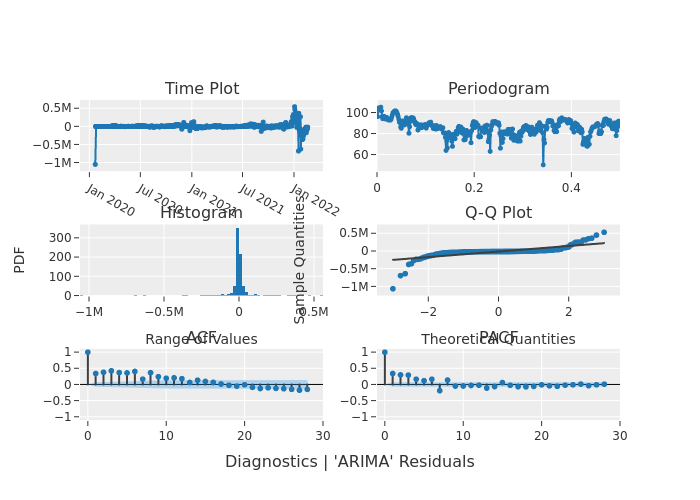

In [6]:
plot_model(best, plot = 'diagnostics')

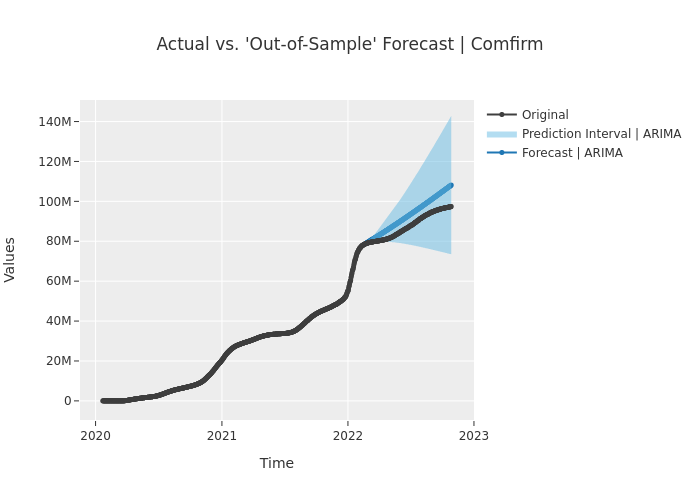

In [7]:
plot_model(best, plot = 'forecast')

In [8]:
#plot_model(best, plot = 'insample')

In [9]:
final_best = finalize_model(best)
#predict_model(best, fh = 24)

In [10]:
save_model(final_best, 'my_final_best_model')

Transformation Pipeline and Model Successfully Saved


(ARIMA(seasonal_order=(0, 1, 0, 7)), 'my_final_best_model.pkl')

In [11]:
loaded_model = load_model('my_final_best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
ARIMA(seasonal_order=(0, 1, 0, 7))
